# Subtask 1:

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('cluster2.csv',names=['X','Y'])
data.head()


,X,Y
0,-0.42921,-2.0902
1,-0.58220,-1.8814
2,1.13240,1.6742
3,-0.19600,-2.5856
4,-0.66683,-2.6191


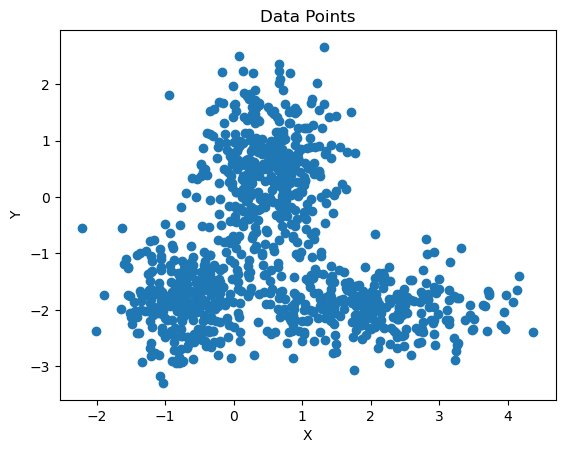

In [4]:
# Plot the data points
plt.scatter(data['X'], data['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points')
plt.show()


## Select the number of Clusters:

C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

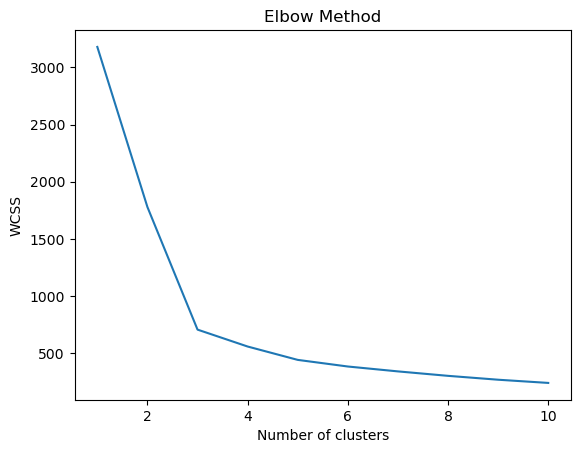

In [11]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the results of the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


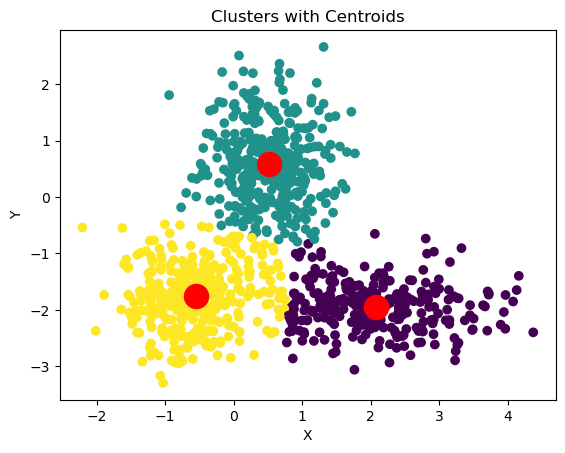

In [14]:
# Applying k-means to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data)

# Plot the clustered data
plt.scatter(data['X'], data['Y'], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')  # Cluster centroids
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters with Centroids')
plt.show()


## Kmeans vs GMM

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [8]:
def cluster_data(data, n_clusters):
    # K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_labels = kmeans.fit_predict(data)

    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm_labels = gmm.fit_predict(data)

    # Plotting
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(data['X'], data['Y'], c=kmeans_labels, cmap='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.subplot(1, 2, 2)
    plt.scatter(data['X'], data['Y'], c=gmm_labels, cmap='viridis')
    plt.title('Gaussian Mixture Model')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.tight_layout()
    plt.show()

    # Calculate silhouette scores
    kmeans_silhouette = silhouette_score(data, kmeans_labels)
    gmm_silhouette = silhouette_score(data, gmm_labels)
    print(f"Silhouette Score for K-Means: {kmeans_silhouette}")
    print(f"Silhouette Score for GMM: {gmm_silhouette}")


C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


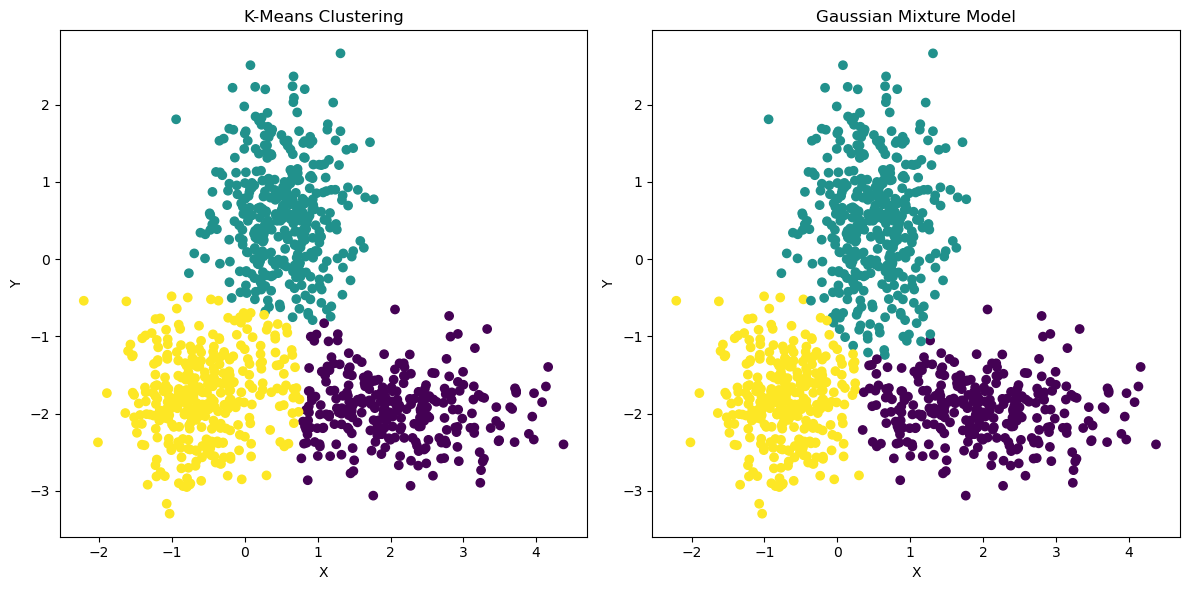

Silhouette Score for K-Means: 0.5738307485410833
Silhouette Score for GMM: 0.5664622727042825


In [9]:
# Execute the clustering function with an estimated number of clusters
cluster_data(data, n_clusters=3)


C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


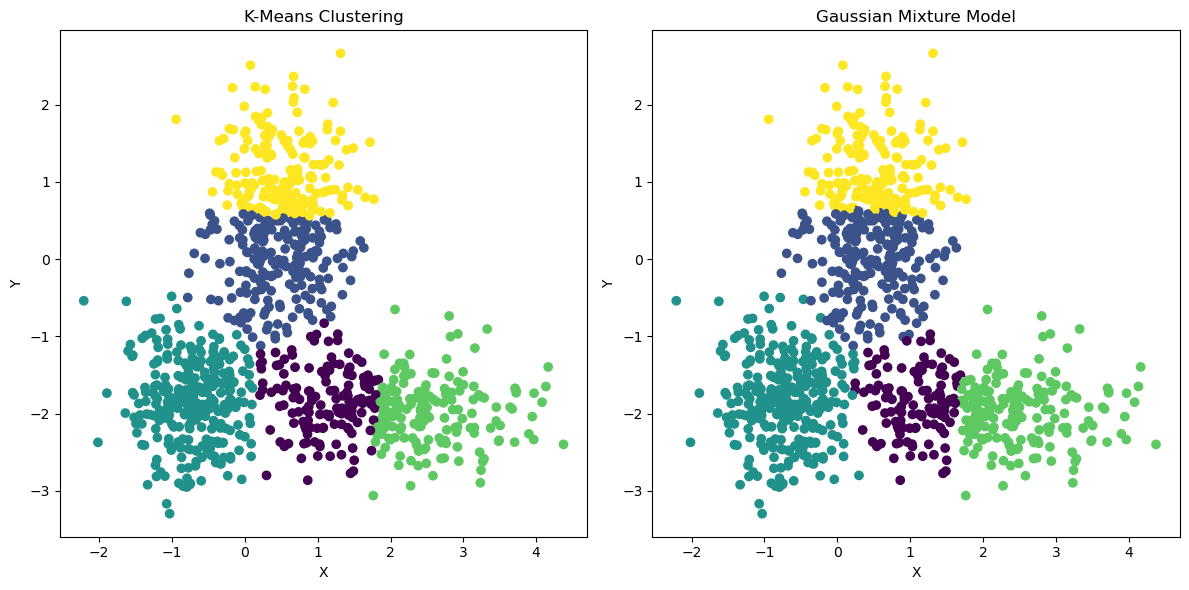

Silhouette Score for K-Means: 0.4173308817490141
Silhouette Score for GMM: 0.4110304978776016


In [10]:
# Execute the clustering function with an estimated number of clusters
cluster_data(data, n_clusters=5)

In [15]:
def analyze_clusters(data, labels):
    cluster_data = data.copy()
    cluster_data['Cluster'] = labels
    summary_stats = cluster_data.groupby('Cluster').agg(['mean', 'std', 'count'])
    return summary_stats

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(data)
kmeans_stats = analyze_clusters(data, kmeans_labels)
print("K-Means Cluster Statistics:")
print(kmeans_stats)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(data)
gmm_stats = analyze_clusters(data, gmm_labels)
print("\nGMM Cluster Statistics:")
print(gmm_stats)


C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K-Means Cluster Statistics:
                X                         Y                
             mean       std count      mean       std count
Cluster                                                    
0        2.085343  0.803474   281 -1.941690  0.418915   281
1        0.517058  0.475846   375  0.591993  0.682100   375
2       -0.554840  0.569072   344 -1.759410  0.556581   344

GMM Cluster Statistics:
                X                         Y                
             mean       std count      mean       std count
Cluster                                                    
0        1.989077  0.869755   298 -1.950887  0.395044   298
1        0.510692  0.472785   402  0.490606  0.760902   402
2       -0.696767  0.451082   300 -1.815714  0.538169   300


C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


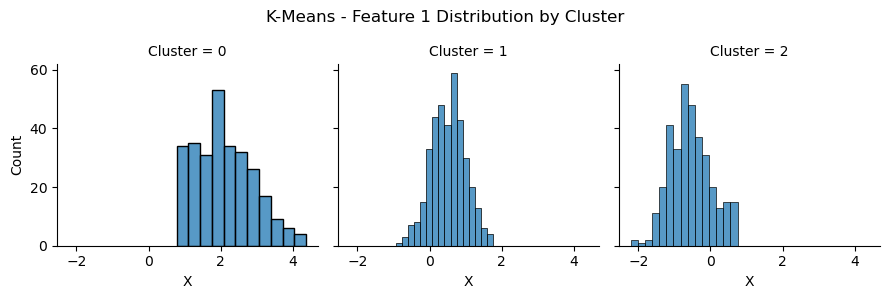

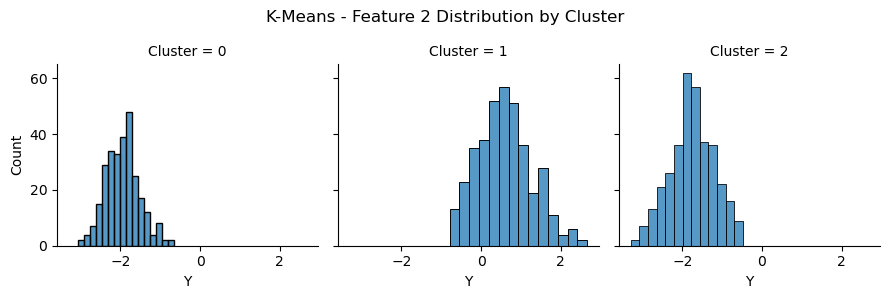

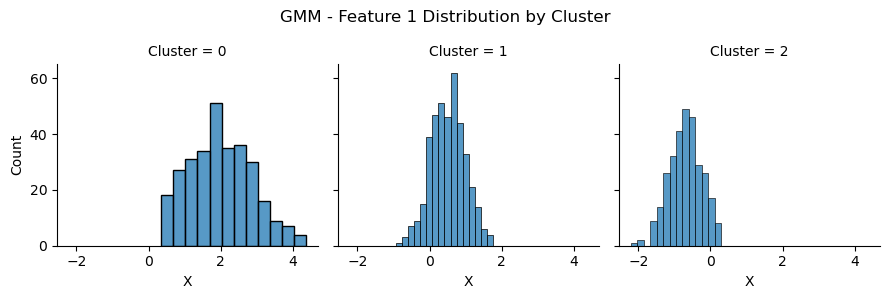

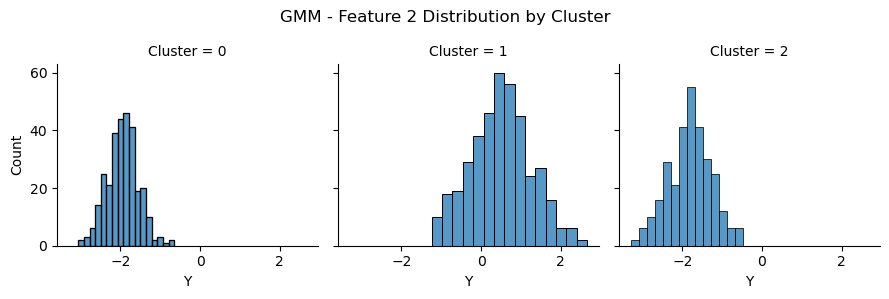

In [17]:
import seaborn as sns

def plot_cluster_distribution(data, labels, cluster_title):
    cluster_data = data.copy()
    cluster_data['Cluster'] = labels
    g = sns.FacetGrid(cluster_data, col='Cluster')
    g.map(sns.histplot, 'X')
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle(f'{cluster_title} - Feature 1 Distribution by Cluster')

    g = sns.FacetGrid(cluster_data, col='Cluster')
    g.map(sns.histplot, 'Y')
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle(f'{cluster_title} - Feature 2 Distribution by Cluster')
    plt.show()

plot_cluster_distribution(data, kmeans_labels, 'K-Means')
plot_cluster_distribution(data, gmm_labels, 'GMM')


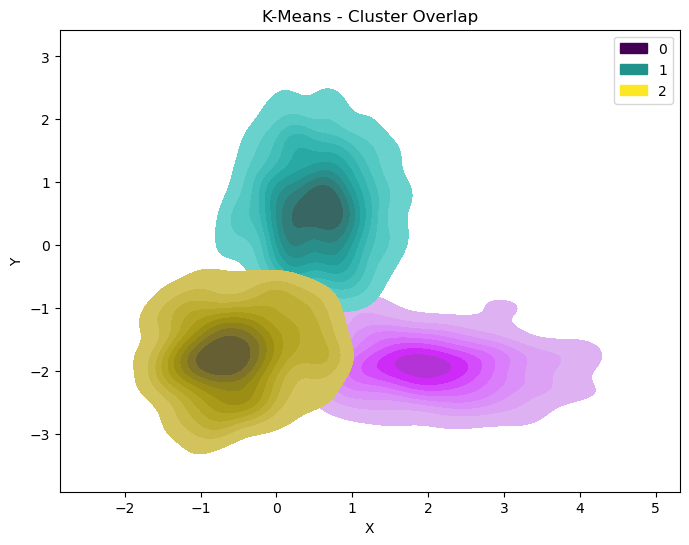

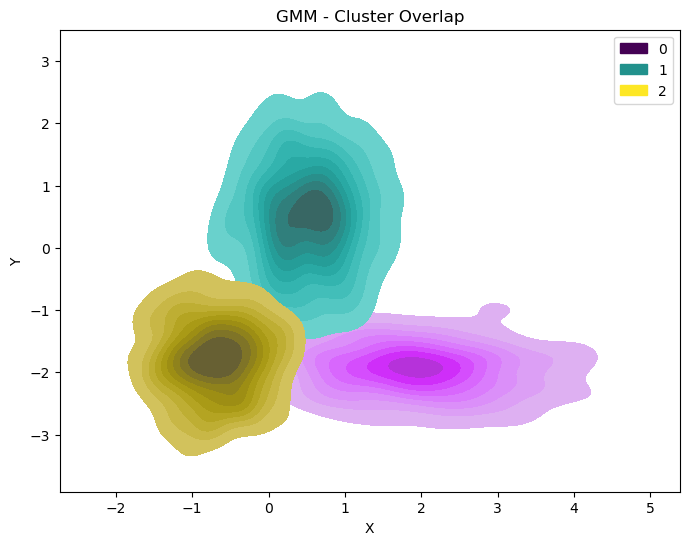

In [19]:
def plot_cluster_overlap(data, labels, model_name):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=data, x='X', y='Y', hue=labels, palette='viridis', fill=True)
    plt.title(f'{model_name} - Cluster Overlap')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

plot_cluster_overlap(data, kmeans_labels, 'K-Means')
plot_cluster_overlap(data, gmm_labels, 'GMM')


In [20]:
# For K-Means centroids
print("K-Means Centroids:")
print(kmeans.cluster_centers_)

# For GMM means and covariances
print("\nGMM Means:")
print(gmm.means_)
print("\nGMM Covariances:")
print(gmm.covariances_)


K-Means Centroids:
[[ 2.08534306 -1.94169018]
 [ 0.51705824  0.59199266]
 [-0.55484037 -1.75941026]]

GMM Means:
[[ 1.94321447 -1.94560769]
 [ 0.51319531  0.48450699]
 [-0.69423189 -1.8023891 ]]

GMM Covariances:
[[[ 0.85005824 -0.03325453]
  [-0.03325453  0.16137472]]

 [[ 0.22623061 -0.00421739]
  [-0.00421739  0.60454372]]

 [[ 0.21607117  0.00337051]
  [ 0.00337051  0.3072582 ]]]


## Justification:

#### K-Means: 
provides a straightforward, computationally efficient method to cluster this dataset, producing relatively tight and evenly distributed clusters. It's best used when the clusters are roughly spherical and evenly sized.
#### GMM: 
is more flexible, accommodating clusters with different shapes and densities. It's preferable when the clusters are expected to have different variances or non-spherical shapes, as observed in the overlap visualizations.
#### K-Means was chosen over GMM: 
Becuase Kmeans is straihtforward , computationally efficient and silhoutte score was always better than GMM. in the overlap test Kmeans are well separated but in GMM it captures the complex cluster shape.The means and standard deviations for each cluster indicate that K-Means has effectively partitioned the space with reasonable separation between clusters in both X and Y dimensions.

#### Number of Cluster:
Was decided with the elbow mehtod. The graph start changing as a elbow at the point of 3. So the number of cluster should be 3.

If the goal is to capture the nuanced relationships and overlaps between different groups, GMM appears to be more effective. However, if simplicity and speed are priorities, and the data can be reasonably approximated with spherical clusters, K-Means remains a strong choice.